# My First Convolutional Neural Network : CIFAR-10
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

### Keras Upgrade

In [1]:
#!pip install keras-nightly

## Real Game : CNN on CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [2]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import keras

### Data Loading

In [3]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:

labels = {0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 2271
다음 그림은 Truck 입니다.


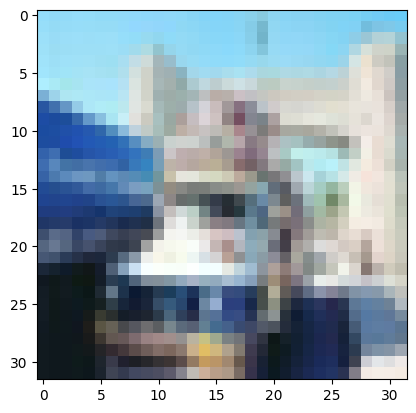

In [6]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id][0]]} 입니다.')
plt.imshow(test_x[id])
plt.show()

### X : 표준화 Scaling (standardization)

$$ X_{scaled} = {{x_{original} - mean(x)}\over{std(x)} } $$

* Choose 1. 한꺼번에 Standardization 적용

In [7]:
train_x.shape, test_x.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [8]:
mean,std=train_x.mean(),train_x.std()

train_x=(train_x-mean)/std
test_x=(test_x-mean)/std

* Choose 2. 채널별로 Standardization 적용

In [9]:
# 채널갯수=3,RGB,색상별로 표준화 시켜주기
train_x.shape

(50000, 32, 32, 3)

In [10]:
r_mean,r_std=train_x[:,:,:,0].mean(),train_x[:,:,:,0].std()
g_mean,g_std=train_x[:,:,:,1].mean(),train_x[:,:,:,1].std()
b_mean,b_std=train_x[:,:,:,2].mean(),train_x[:,:,:,2].std()

In [11]:
(r_mean,r_std),(g_mean,g_std),(b_mean,b_std)

((0.0716967651134714, 0.98196640304919),
 (0.034962219230008626, 0.9678664721362821),
 (-0.10665898434348042, 1.039825732300705))

In [12]:
train_x_r=(train_x[:,:,:,0]-r_mean)/r_std
train_x_g=(train_x[:,:,:,1]-g_mean)/g_std
train_x_b=(train_x[:,:,:,2]-b_mean)/b_std

In [13]:
print(train_x_r.mean(),train_x_r.std())
print(train_x_g.mean(),train_x_g.std())
print(train_x_b.mean(),train_x_b.std())

-1.1326939386435697e-16 0.9999999999999988
1.4944490089874307e-16 0.9999999999999948
2.9327651418498135e-16 1.0


In [14]:
train_x_arr=np.stack((train_x_r,train_x_g,train_x_b),axis=3)

In [15]:
train_x_arr.shape

(50000, 32, 32, 3)

In [16]:
test_x_r=(test_x[:,:,:,0]-r_mean)/r_std
test_x_g=(test_x[:,:,:,1]-g_mean)/g_std
test_x_b=(test_x[:,:,:,2]-b_mean)/b_std

In [17]:
test_x_arr=np.stack((test_x_r,test_x_g,test_x_b),axis=3)

In [18]:
test_x.shape

(10000, 32, 32, 3)

### Y : One-Hot Encoding

In [19]:
from keras.utils import to_categorical

classes=len(np.unique(train_y))

train_y=to_categorical(train_y,classes)
test_y=to_categorical(test_y,classes)

In [20]:
train_x.shape,train_y.shape

((50000, 32, 32, 3), (50000, 10))

### 코드를 완성해주세요!: FC구조

- 조건
    - **model.fit( ) 을 history 에 담아서 학습 과정의 로그를 남길 것.**
    - EarlyStopping 의 옵션도 조절해보자.
---

- **자유롭게 먼저 해보는 것을 추천**

---



In [21]:
import keras

from keras.utils import clear_session
from keras.models import Model,Sequential
from keras.layers import Input,Dense,Flatten,Dropout,BatchNormalization

from keras.callbacks import EarlyStopping

#### Sequential API

In [22]:
## 1. 세션 클리어
clear_session()

## 2. 모델 선언
model_fc = Sequential()

## 3. 레이어 조립
model_fc.add( Input(shape=(32,32,3)) )
model_fc.add( Flatten() )
model_fc.add( Dense(256, activation='relu') )
model_fc.add( Dense(256, activation='relu') )
model_fc.add( BatchNormalization() )
model_fc.add( Dropout(0.25) )
model_fc.add( Dense(128, activation='relu') )
model_fc.add( Dense(128, activation='relu') )
model_fc.add( BatchNormalization() )
model_fc.add( Dropout(0.25) )
model_fc.add( Dense(64, activation='relu') )
model_fc.add( Dense(64, activation='relu') )
model_fc.add( BatchNormalization() )
model_fc.add( Dropout(0.25) )
model_fc.add( Dense(10, activation='softmax') )

## 요약
model_fc.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 916,746 (3.50 MB)

 Trainable params: 915,850 (3.49 MB)

 Non-trainable params: 896 (3.50 KB)

#### Functional API

In [23]:
## 1. 세션 클리어
clear_session()

## 2. 레이어 조립
il = Input(shape=(32,32,3))
hl = Flatten()(il)
hl = Dense(256, activation='relu')(hl)
hl = Dense(256, activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)
hl = Dense(128, activation='relu')(hl)
hl = Dense(128, activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)
hl = Dense(64, activation='relu')(hl)
hl = Dense(64, activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)
ol = Dense(10, activation='softmax')(hl)

## 3. 모델 시작 끝 지정
model_fc = Model(il, ol)

## 요약
model_fc.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 916,746 (3.50 MB)

 Trainable params: 915,850 (3.49 MB)

 Non-trainable params: 896 (3.50 KB)

In [24]:
model_fc.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#### 모델 학습

In [25]:
# EarlyStopping

es=EarlyStopping(monitor='var_loss',
                 mode='min',
                 min_delta=0,
                 patience=4,
                 verbose=1,
                 restore_best_weights=True)

In [26]:
history = model_fc.fit(train_x,train_y,batch_size=128,epochs=10,verbose=1,callbacks=[es],validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.2266 - loss: 2.3077 - val_accuracy: 0.3902 - val_loss: 1.6975
Epoch 2/10
 64/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3649 - loss: 1.7784

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `var_loss` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3697 - loss: 1.7554 - val_accuracy: 0.4281 - val_loss: 1.5899
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4316 - loss: 1.5972 - val_accuracy: 0.4683 - val_loss: 1.5174
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4666 - loss: 1.5055 - val_accuracy: 0.4608 - val_loss: 1.5048
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4970 - loss: 1.4225 - val_accuracy: 0.4838 - val_loss: 1.4661
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5120 - loss: 1.3710 - val_accuracy: 0.4984 - val_loss: 1.4253
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5357 - loss: 1.3107 - val_accuracy: 0.5159 - val_loss: 1.3947
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5561 - loss: 1.2682 - val_accuracy: 0.5178 - val_loss: 1.3822
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5712 - loss: 1.2181 - val_accuracy: 0.5108 - val_

### 코드를 완성해주세요!: CNN 구조

- 조건
    - **model.fit( ) 을 history 에 담아서 학습 과정의 로그를 남길 것.**
    - EarlyStopping 의 옵션도 조절해보자.
---

- **자유롭게 먼저 해보는 것을 추천**

---

- **구조를 따라서 코딩을 한다면**
    0. Functional, Sequential 중 택일
    1. 인풋레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    4. BatchNormalization
    5. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    6. DropOut : 25% 비활성화
    7. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    11. DropOut : 25% 비활성화
    12. Flatten( )
    13. Fully Connected Layer : 노드 1024개
    14. BatchNormalization
    15. DropOut : 35% 비활성화
    16. 아웃풋레이어



In [27]:
import keras

from keras.utils import clear_session
from keras.models import Model,Sequential
from keras.layers import Input,Dense,Flatten,Dropout,BatchNormalization,MaxPool2D,Conv2D

from keras.callbacks import EarlyStopping

#### Sequential API

In [28]:
clear_session()

model=Sequential([Input(shape=(32,32,3)),
                  Conv2D(filters=32,
                         kernel_size=(3,3),
                         strides=(1,1),
                         padding='same',
                         activation='relu'),
                  Conv2D(filters=32,
                         kernel_size=(3,3),
                         strides=(1,1),
                         padding='same',
                         activation='relu'),
                  BatchNormalization(),
                  MaxPool2D(pool_size=(2,2),
                            strides=(2,2)),
                  Dropout(0.25),
                  Conv2D(filters=64,
                         kernel_size=(3,3),
                         strides=(1,1),
                         padding='same',
                         activation='relu'),
                  Conv2D(filters=64,
                         kernel_size=(3,3),
                         strides=(1,1),
                         padding='same',
                         activation='relu'),
                  BatchNormalization(),
                  MaxPool2D(pool_size=(2,2),
                            strides=(2,2)),
                  Dropout(0.25),
                  Flatten(),
                  Dense(1024, activation='relu'),
                  BatchNormalization(),
                  Dropout(.35),
                  Dense(10, activation='softmax')
                  ])

model.summary()

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,275,626 (16.31 MB)

 Trainable params: 4,273,386 (16.30 MB)

 Non-trainable params: 2,240 (8.75 KB)

#### Functional API

In [29]:
# clear_session()

# il=Input(shape=(32,32,3))
# hl=Conv2D(32,3,1,'same',activation='relu')(il)
# hl=Conv2D(32,3,1,'same',activation='relu')(hl)
# hl=BatchNormalization()(hl)
# hl=MaxPool2D(2)(hl)
# hl=Dropout(.25)(hl)
# hl=Conv2D(64,3,1,'same',activation='relu')(hl)
# hl=Conv2D(64,3,1,'same',activation='relu')(hl)
# hl=BatchNormalization()(hl)
# hl=MaxPool2D(2)(hl)
# hl=Dropout(.25)(hl)
# hl=Flatten()(hl)
# hl=Dense(1024,activation='relu')(hl)
# hl=BatchNormalization()(hl)
# hl=Dropout(.35)(hl)
# ol=Dense(10,activation='softmax')(hl)

# model=Model(il,ol)

# model.summary()

# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#### 모델 학습

In [30]:
# EarlyStopping
es=EarlyStopping(monitor='var_loss',
                 mode='min',
                 min_delta=0,
                 patience=5,
                 verbose=1,
                 restore_best_weights=True)

In [31]:
history = model.fit(train_x,train_y,batch_size=128,epochs=10,verbose=1,callbacks=[es],validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.4026 - loss: 1.9692 - val_accuracy: 0.1578 - val_loss: 8.6225
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6066 - loss: 1.1147 - val_accuracy: 0.6225 - val_loss: 1.1087
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6936 - loss: 0.8744 - val_accuracy: 0.6985 - val_loss: 0.8738
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7377 - loss: 0.7418 - val_accuracy: 0.7220 - val_loss: 0.8065
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7742 - loss: 0.6413 - val_accuracy: 0.7394 - val_loss: 0.7780
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8004 - loss: 0.5690 - val_accuracy: 0.7420 - val_loss: 0.7883
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8258 - loss: 0.4914 - val_accuracy: 0.7594 - val_loss: 0.7037
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8448 - loss: 0.4360 - val_accuracy: 

accuracy 얼마나 잘 맞췄는지
loss 확률분포

accuracy와 loss는 반비례 관계일 것 같으나 아닐 수도 있다

### 성능 평가

In [32]:
performance_test = model.evaluate(test_x, test_y)

print( f'Test Loss : {performance_test[0]:.6f}, Test Accuracy : {performance_test[1]*100:.3f}%' )

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7724 - loss: 0.7299
Test Loss : 0.721191, Test Accuracy : 77.290%


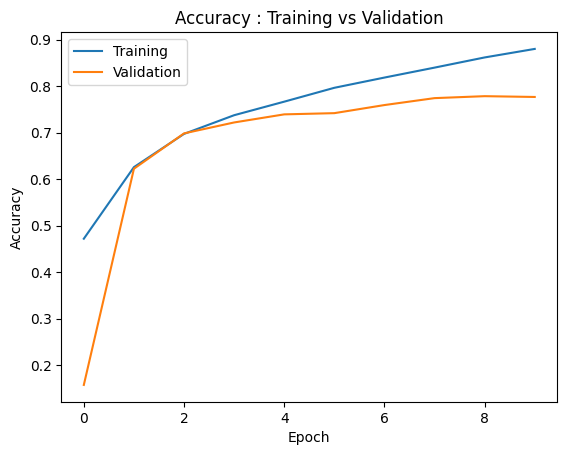

In [33]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

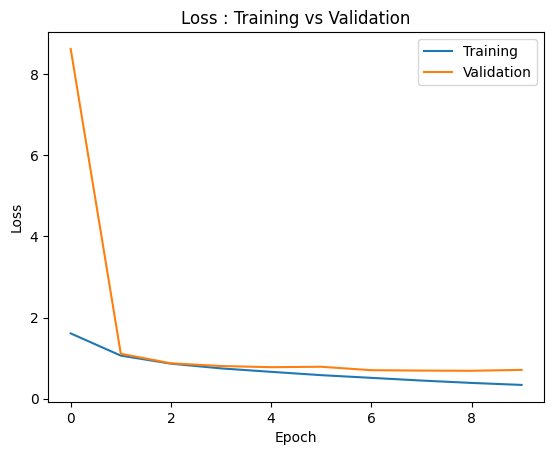

In [34]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [35]:
# 원핫 인코딩 해제
train_y = train_y.argmax(axis=1)
test_y = test_y.argmax(axis=1)

In [36]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%')
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%')

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN
트레이닝 정확도 : 91.14%
테스트 정확도 : 77.29%


id = 4087
다음 그림은 Dog 입니다.
모델의 예측 : Dog
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 0.0, 'Bird': 0.0, 'Cat': 1.0, 'Deer': 0.0, 'Dog': 98.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 0.0, 'Truck': 0.0}
정답입니다


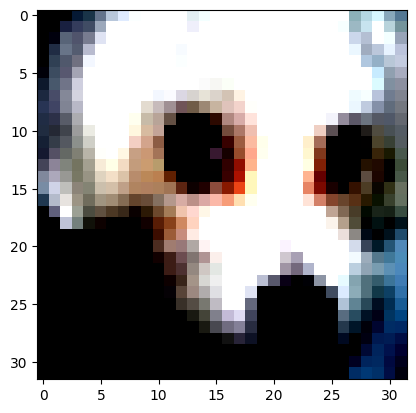

In [37]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

id = 277
다음 그림은 Cat 입니다.
모델의 예측 : Horse
모델의 카테고리별 확률 : 
{'Airplane': 2.0, 'Automobile': 3.0, 'Bird': 17.0, 'Cat': 1.0, 'Deer': 0.0, 'Dog': 0.0, 'Frog': 0.0, 'Horse': 70.0, 'Ship': 0.0, 'Truck': 3.0}
틀렸어요


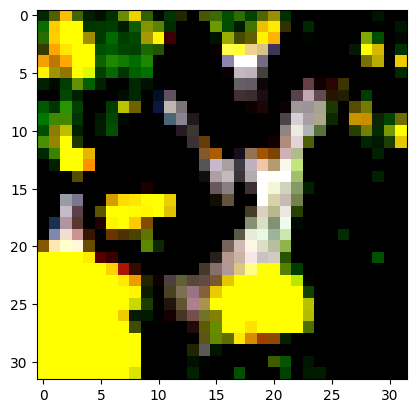

In [38]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]


print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()